In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt

with open('./muestras/index.json') as f:
    json_data = json.load(f)

In [2]:
json['gaussian_1']['cov']

[[0.9486545337793236, 0.8898027211921073, 0.6100372359467587],
 [0.8898027211921073, 0.8713281325959036, 0.5399206528673799],
 [0.6100372359467587, 0.5399206528673799, 0.4206449508316386]]

# Matrices empiricas

In [5]:
folders = [f'gaussian_{i}' for i in range(1,10)]
size = [100, 1000, 10000,100000, 1000000]
gaussians = []
gaussiansJson={}
for i,folder in enumerate(folders):
    original = np.array(json[folder]['cov'])
    #length = len(original)
    norms = []
    for j in range(1,101):
        data = np.load('./muestras/'+folder+f'/samples{j}.npy')
        sample_norms =[]
        for n_samples in size:        
            samples = data[:n_samples]        
            empiric_cov = np.cov(samples.T)
            norm = np.linalg.norm(original-empiric_cov)
            #norm = np.mean(original-empiric_cov)
            sample_norms.append(norm)
        np_sample_norms = np.array(sample_norms).reshape(1,-1)
        norms.append(np_sample_norms)
    np_norms = np.concatenate(norms, axis=0)
    mean = np.mean(np_norms, axis=0)
    std = np.std(np_norms, axis=0)
    gaussians.append({
        "mean":mean,
        "std":std
    })
    gaussiansJson[f"gaussian_{i+1}"]={
        "mean":mean.tolist(),
        "std":std.tolist()
    }


AttributeError: 'dict' object has no attribute 'dump'

In [8]:
with open("./norms.json", "w") as f:
        json.dump(gaussiansJson, f)

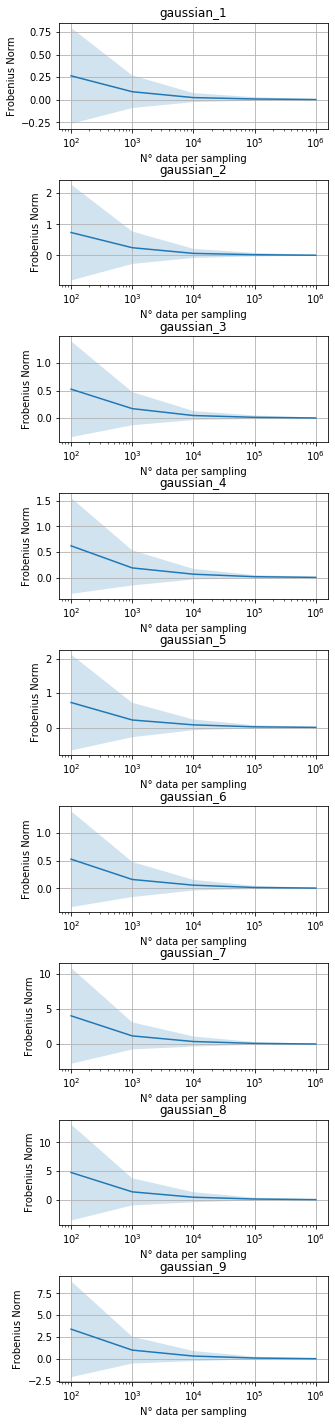

In [11]:
fig, axs = plt.subplots(len(folders))
fig.set_size_inches(5,20)
fig.tight_layout(pad=3.0)
for i,folder in enumerate(folders):
    gaussian = gaussians[i]
    mean = gaussian['mean']
    std = gaussian['std']
    axs[i].plot(size, mean)
    axs[i].fill_between(size, mean-3*std, mean+3*std, alpha=0.2)
    axs[i].set_title(folder)
    axs[i].set_xscale('log')
    axs[i].grid()
    axs[i].set_xlabel('N° data per sampling')
    axs[i].set_ylabel('Frobenius Norm')
fig.savefig('empiricas.png')

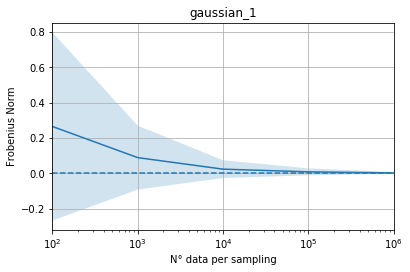

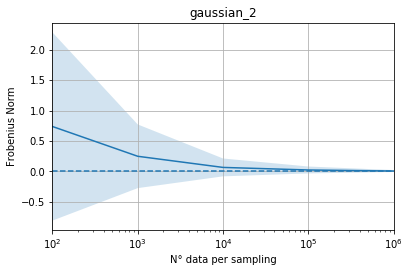

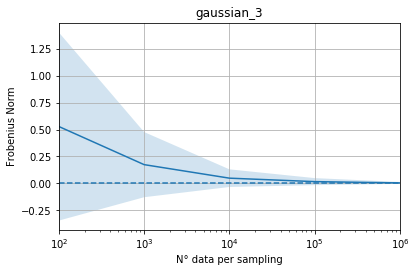

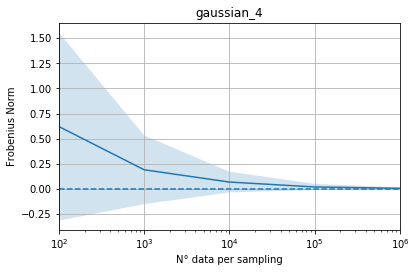

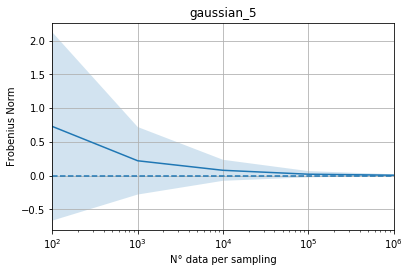

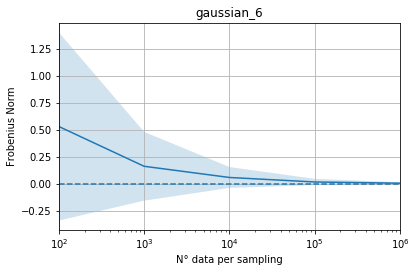

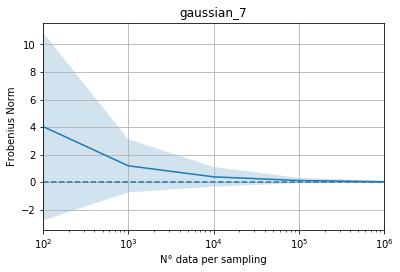

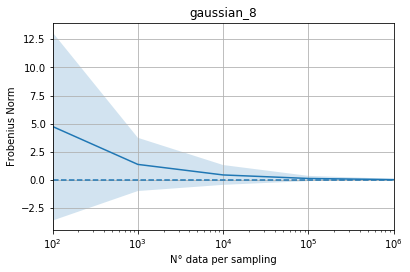

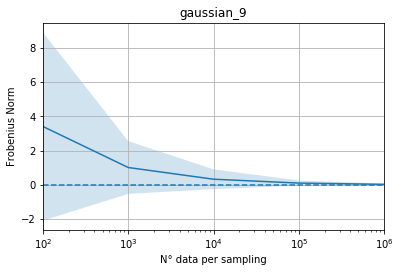

In [25]:
for i, folder in enumerate(folders):
    fig, ax = plt.subplots()
    fig.tight_layout(pad=3.0)
    gaussian = gaussians[i]
    mean = gaussian['mean']
    std = gaussian['std']
    ax.plot(size, mean)
    ax.fill_between(size, mean-3*std, mean+3*std, alpha=0.2)
    ax.set_title(folder)
    ax.set_xscale('log')
    ax.grid()
    ax.set_xlabel('N° data per sampling')
    ax.set_ylabel('Frobenius Norm')
    ax.axhline(0, linestyle="--", color="C0")
    ax.set_xlim(10**2, 10**6)
    fig.savefig(f'./plots/norms/cov_gaussian_{i+1}.pdf')

# Rango de matrices originales

In [ ]:
for folder in folders:
    cov = np.array(json[folder]['cov'])
    print(np.linalg.matrix_rank(cov))

In [ ]:
metric_plot = "TC"
i = 0
for gaussian_i in sorted(os.listdir(results_folder)):
    if i % 3 == 0:
        i = 0
        fig, ax = plt.subplots(figsize=(10,5))
    mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
    std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
    mean = mean.rename(columns={metric_plot: gaussian_i})
    mean[[gaussian_i]].plot(ax=ax)
    ax.fill_between(mean.index, mean[gaussian_i]-3*std[metric_plot], mean[gaussian_i]+3*std[metric_plot], alpha=0.2)
    ax.axhline(y=index[gaussian_i][metric_plot], color=f"C{i}", linestyle='--')
    ax.set_xscale('log')
    ax.set_title(metric_plot)
    plt.xlim(10*2, 10*5)
    plt.grid(axis="x")
    i += 1

In [ ]:
for i in range(1,101):
    print(i)